In [2]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure

## H1 - Existiu alguma disciplina que foi ministrada Sábado à noite?

In [3]:
#Cabeçalho
cabecalho = ['SIAPE','NIVEL','ANO_PERIODO','COD_DISCI','NOME_DISCI','CARGA_HR','HORARIOS']
#Abrindo o arquivo csv como Data Frame no Pandas
df = pd.read_csv("horarios_ufersa.csv", header=None,names=cabecalho, sep=',')

#Pega o resultado de todas as disciplinas ministradas no sábado à noite!
sabado = df[(df['HORARIOS'] == '7N1234') | (df['HORARIOS'] == '7N12') | (df['HORARIOS'] == '7N34')]

In [4]:
# Conta o número de horários do sábado
pd.value_counts(sabado['HORARIOS'])

7N1234    12
7N12       6
7N34       2
Name: HORARIOS, dtype: int64

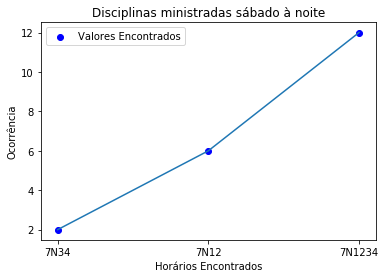

In [5]:
"""
x = Horários
y = Número de vezes que ocorreu esse determinado horário
"""

x = ["7N34", "7N12", "7N1234"]
y = [2,6,12]

titulo = "Disciplinas ministradas sábado à noite"
eixox = "Horários Encontrados"
eixoy = "Ocorrência"

#Legendas
plt.title(titulo)
plt.xlabel(eixox)
plt.ylabel(eixoy)


plt.scatter(x, y, label = "Valores Encontrados", color = "b")
plt.legend()
plt.plot(x, y)
plt.show()

## H2-  Existem horários que ocorrem com maior frequência?

In [6]:
"""
Utilizei pd.value_counts(df['HORARIOS'])
Salvei em um arquivo csv: df.to_csv('Horarios.csv')
"""
#Cabeçalho do arquivo
cabecalho2 = ['HORARIOS','OCORRÊNCIA']

# Abrindo arquivo csv como DataFrame no Pandas
df2 = pd.read_csv("Horarios.csv", header=None, names=cabecalho2, sep=',')

In [7]:
"""
Como o número de dados é muito extenso (1842 linhas)
irei usar só os 5 primeiros resultados.

Obs: Tive difificuldade em regular esse índice
por isso escrevi o resultado nos vetores HR = Horários
e OCO = Ocorrência

"""
# df2
df2.head()

,HORARIOS,OCORRÊNCIA
0,24N12,509
1,3N34 5N12,452
2,24T23,399
3,6N1234,340
4,25N34,309


<BarContainer object of 5 artists>

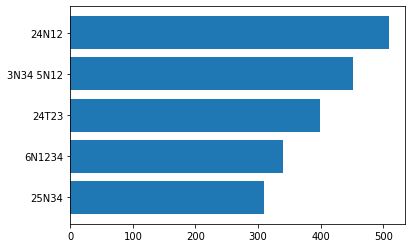

In [8]:

HR = ["25N34","6N1234","24T23","3N34 5N12","24N12"]
OCO = [309,340,399,452,509]




fig, ax = plt.subplots()
ax.barh(HR , OCO)

## Comparando o número de aulas no sábado a noite com os horários que ocorrem com maior frequência.

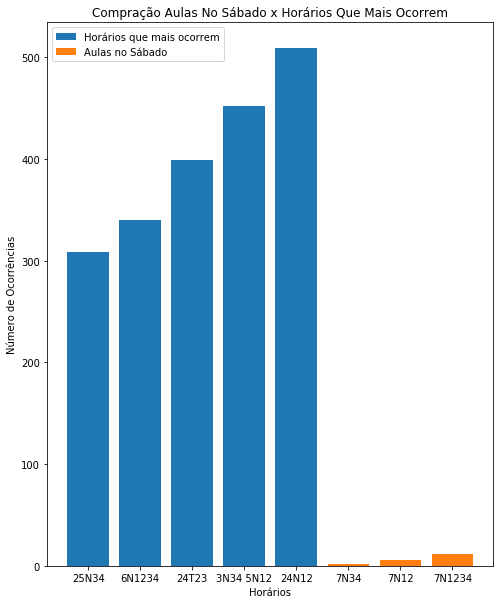

In [9]:

plt.figure(figsize=(8,10))
titulo = "Compração Aulas No Sábado x Horários Que Mais Ocorrem"
eixox = "Horários"
eixoy = "Número de Ocorrências"

#Legendas
plt.title(titulo)
plt.xlabel(eixox)
plt.ylabel(eixoy)

#Gráfico de barra.
plt.bar(HR, OCO, label = "Horários que mais ocorrem")
plt.bar(x, y, label = "Aulas no Sábado")
plt.legend()
plt.show()


## H3 - Em qual ano entre 2015.1 a 2018.2 foi ofertado o maior número de disciplinas?

In [10]:
df3 = df[(df['ANO_PERIODO'] >= 2015.1) & (df['COD_DISCI']) & (df['ANO_PERIODO'] <= 2018.2)]

pd.value_counts(df3['ANO_PERIODO'])

2018.2    2285
2018.1    2256
2017.2    2032
2017.1    1892
2016.2    1802
2016.1    1577
2015.2    1552
2015.1    1494
2015.3      16
2015.4       5
2016.3       4
2017.3       1
2017.4       1
2016.4       1
Name: ANO_PERIODO, dtype: int64

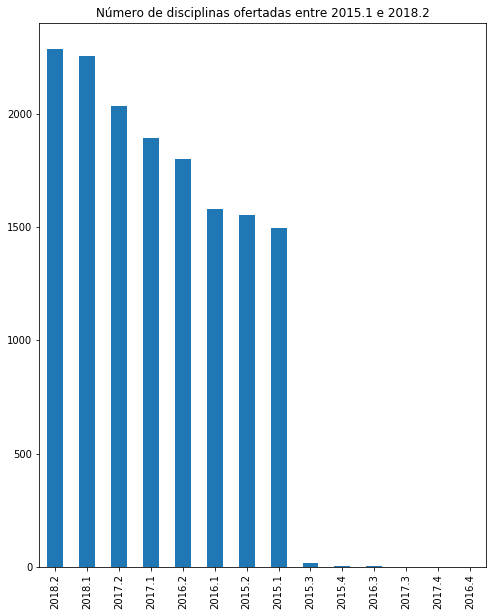

In [11]:
plt.figure(figsize=(8,10))
pd.value_counts(df3['ANO_PERIODO']).plot.bar(title='Número de disciplinas ofertadas entre 2015.1 e 2018.2')

## H4 - Existem mais disciplinas de 60H ou de 30H entre o período de 2007.1 e 2018.2?


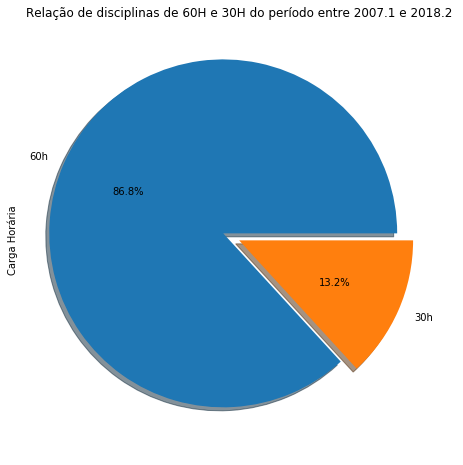

In [12]:
df4 = df[(df['ANO_PERIODO']>= 2007.1) & (df['ANO_PERIODO']<= 2018.2) & (df['CARGA_HR'] == '60h') | (df['CARGA_HR'] == '30h')]
pd.value_counts(df4['CARGA_HR']).plot.pie(title='Relação de disciplinas de 60H e 30H do período entre 2007.1 e 2018.2', label='Carga Horária', shadow=True, explode=(0.1,0),autopct='%.1f%%', figsize=(8, 8))

In [13]:
pd.value_counts(df4['CARGA_HR'])

60h    19552
30h     2972
Name: CARGA_HR, dtype: int64

## H5 - Qual a relação de turmas oferecidas a graduação e a pós-graduação no periodo de 2007. 1 a 2018.2?

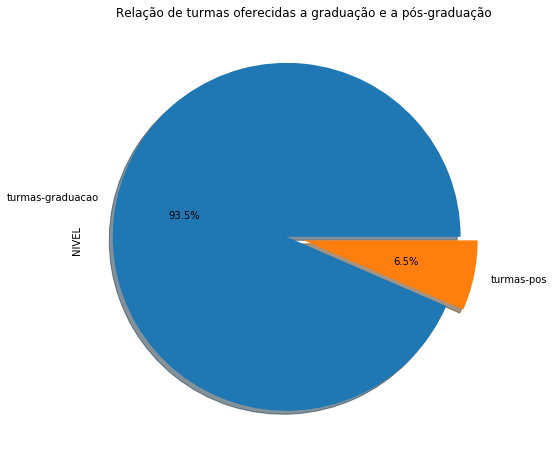

In [14]:
df5 = df[(df['ANO_PERIODO']>= 2007.1) & (df['ANO_PERIODO']<= 2018.2)]
pd.value_counts(df5['NIVEL']).plot.pie(title='Relação de turmas oferecidas a graduação e a pós-graduação', shadow=True, explode=(0.1,0),autopct='%.1f%%', figsize=(8, 8))

In [15]:
pd.value_counts(df5['NIVEL'])

turmas-graduacao    23997
turmas-pos           1673
Name: NIVEL, dtype: int64

## Relação de turmas oferecidas a graduação e a pós-graduação no periodo de 2018.1 a 2018.2

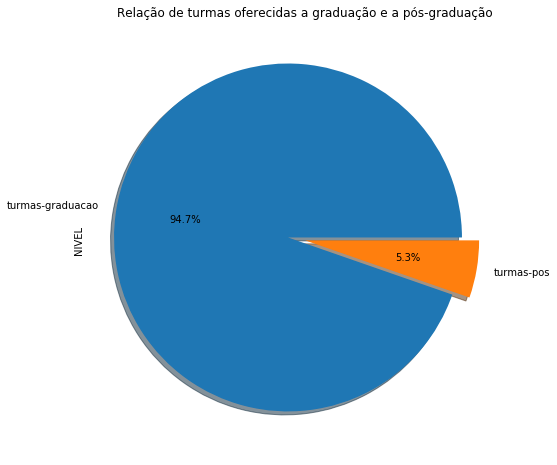

In [16]:
df5 = df[(df['ANO_PERIODO']>= 2018.1) & (df['ANO_PERIODO']<= 2018.2)]
pd.value_counts(df5['NIVEL']).plot.pie(title='Relação de turmas oferecidas a graduação e a pós-graduação', shadow=True, explode=(0.1,0),autopct='%.1f%%', figsize=(8, 8))

In [17]:
pd.value_counts(df5['NIVEL'])

turmas-graduacao    4299
turmas-pos           242
Name: NIVEL, dtype: int64

## H6 - Há a posibilidade do departamento de Ciências humanas do campus Angicos ter o maior número de professores dentre todos os campus da UFERSA?

In [18]:
# cabeçalho para o arquivo csv 
cabecalho3 = ['SIAPE','NOME','DEPARTAMENTO','LINK_FT','LINK_PERFIL']
# abrindo o arquivo csv
df6 = pd.read_csv("professors_information.csv", header=None,names=cabecalho3, sep=',',index_col = False)

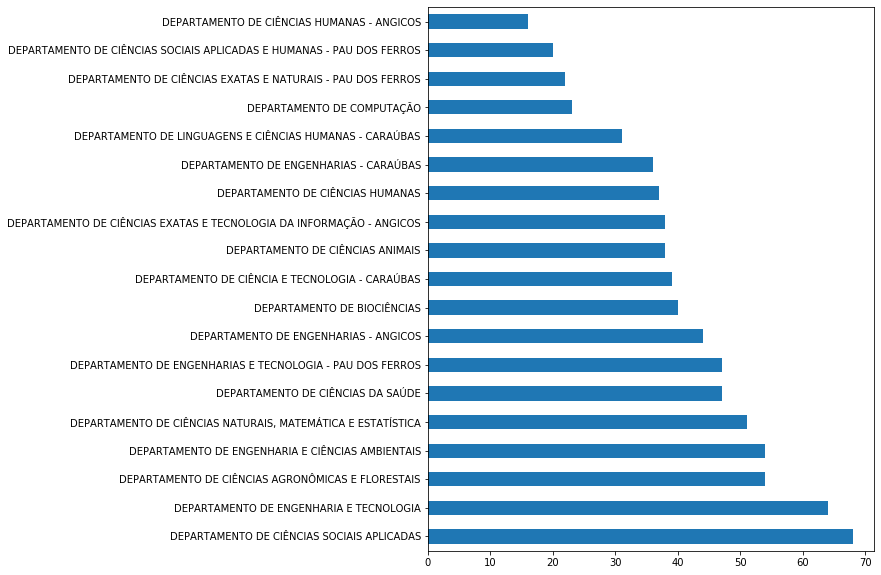

In [19]:
# Altera o tamanho da figura
plt.figure(figsize=(8,10))

# Conta o nome dos professores por departamento
dp = df6['NOME']
pd.value_counts(df6['DEPARTAMENTO']).plot.barh()

In [20]:
pd.value_counts(df6['DEPARTAMENTO'])

DEPARTAMENTO DE CIÊNCIAS SOCIAIS APLICADAS                               68
DEPARTAMENTO DE ENGENHARIA E TECNOLOGIA                                  64
DEPARTAMENTO DE CIÊNCIAS AGRONÔMICAS E FLORESTAIS                        54
DEPARTAMENTO DE ENGENHARIA E CIÊNCIAS AMBIENTAIS                         54
DEPARTAMENTO DE CIÊNCIAS NATURAIS, MATEMÁTICA E ESTATÍSTICA              51
DEPARTAMENTO DE CIÊNCIAS DA SAÚDE                                        47
DEPARTAMENTO DE ENGENHARIAS E TECNOLOGIA - PAU DOS FERROS                47
DEPARTAMENTO DE ENGENHARIAS - ANGICOS                                    44
DEPARTAMENTO DE BIOCIÊNCIAS                                              40
DEPARTAMENTO DE CIÊNCIA E TECNOLOGIA - CARAÚBAS                          39
DEPARTAMENTO DE CIÊNCIAS ANIMAIS                                         38
DEPARTAMENTO DE CIÊNCIAS EXATAS E TECNOLOGIA DA INFORMAÇÃO - ANGICOS     38
DEPARTAMENTO DE CIÊNCIAS HUMANAS                                         37
DEPARTAMENTO

## H7 - Existem disciplinas ministradas pelo professor ARAKEN DE MEDEIROS SANTOS?

In [21]:

"""
O SIAPE do professor também não se encontra na base de dados. 
O número SIAPE foi retirado da página: https://sigaa.ufersa.edu.br/sigaa/public/docente/portal.jsf?siape=1631848
"""
#Pegando o SIAPE do professor
df7 = df6[(df6['SIAPE'] == 1631848) | (df6['NOME'] == 'ARAKEN DE MEDEIROS SANTOS')]
df7


,SIAPE,NOME,DEPARTAMENTO,LINK_FT,LINK_PERFIL


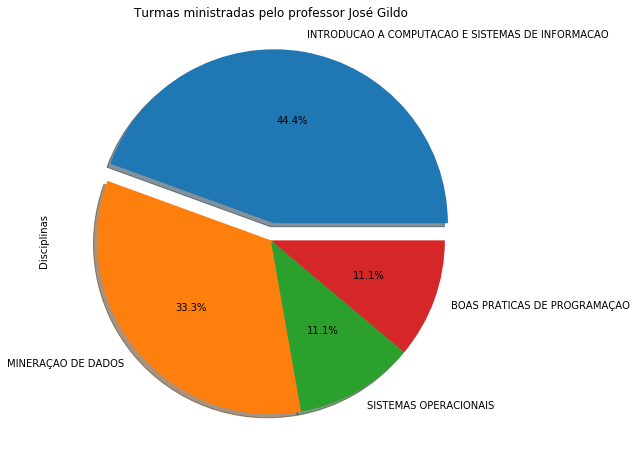

In [22]:
# Teste com o professor Jose Gildo
#df8 = df6[(df6['NOME'] == 'JOSE GILDO DE ARAUJO JUNIOR')]
#int(df8['SIAPE'])

df_h8 = df[(df['SIAPE'] == 2400142)]
pd.value_counts(df_h8['NOME_DISCI']).plot.pie(title='Turmas ministradas pelo professor José Gildo', shadow=True, explode=(0.1,0 ,0 ,0), label = 'Disciplinas',autopct='%.1f%%', figsize=(8, 8))

## H8 - Existe algum ano com disciplinas ministradas domingo a noite?

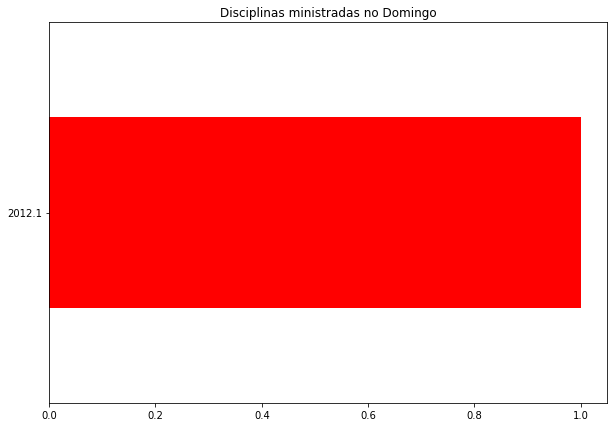

In [23]:
# Criação de DataFrame com disciplinas ministradas no domingo pela manhã
df_domingo_manha = df[df.HORARIOS.str.contains('1M')]

# Criação de DataFrame com disciplinas ministradas no domingo pela tarde
df_domingo_tarde = df[df.HORARIOS.str.contains('1T')]

# Criação de DataFrame com disciplinas ministradas no domingo a noite
df_domingo_noite = df[df.HORARIOS.str.contains('1N')]

# Concatenação dos DataFrames dos três turno
df_domingo = pd.concat([df_domingo_manha, df_domingo_tarde, df_domingo_noite])

# Plotagem do gráfico
pd.value_counts(df_domingo['ANO_PERIODO']).plot.barh(title='Disciplinas ministradas no Domingo', color='r', figsize=(10, 7))

In [24]:
# Nome da disciplina
pd.value_counts(df_domingo['NOME_DISCI'])

VIGILÂNCIA EPIDEMIOLÓGICA DAS DTAS    1
Name: NOME_DISCI, dtype: int64

## H9 - Qual é o top 20 das disciplinas mais ofertadas pela UFERSA no período de 2018.2? 

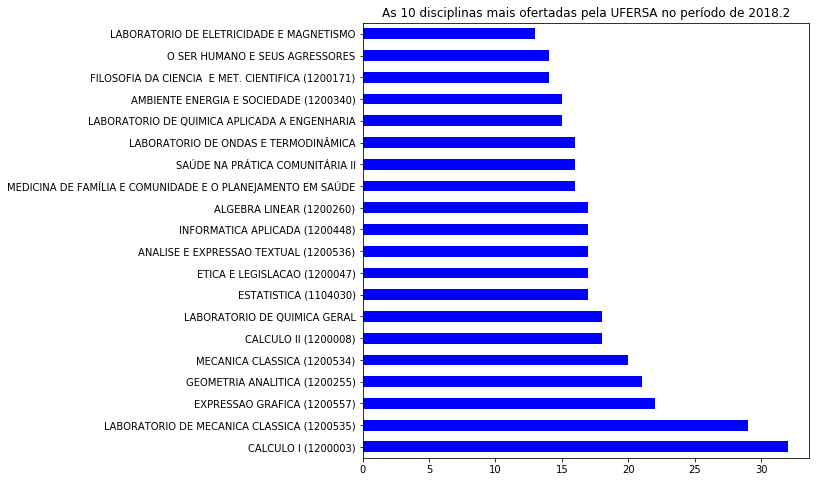

In [25]:
# Restringe para o ano de 2018.2 e conta o nome das disciplinas
# head(20) para mostrar os 20 primeiros resultados
df9 = df[(df['ANO_PERIODO']== 2018.2)]
df9.NOME_DISCI.value_counts().head(20).plot.barh(title='As 10 disciplinas mais ofertadas pela UFERSA no período de 2018.2', color='b', figsize=(8,8))



In [26]:
df9.NOME_DISCI.value_counts().head(20)

CALCULO I (1200003)                                           32
LABORATORIO DE MECANICA CLASSICA (1200535)                    29
EXPRESSAO GRAFICA (1200557)                                   22
GEOMETRIA ANALITICA (1200255)                                 21
MECANICA CLASSICA (1200534)                                   20
CALCULO II (1200008)                                          18
LABORATORIO DE QUIMICA GERAL                                  18
ESTATISTICA (1104030)                                         17
ETICA E LEGISLACAO (1200047)                                  17
ANALISE E EXPRESSAO TEXTUAL (1200536)                         17
INFORMATICA APLICADA (1200448)                                17
ALGEBRA LINEAR (1200260)                                      17
MEDICINA DE FAMÍLIA E COMUNIDADE E O PLANEJAMENTO EM SAÚDE    16
SAÚDE NA PRÁTICA COMUNITÁRIA II                               16
LABORATORIO DE ONDAS E TERMODINÂMICA                          16
LABORATORIO DE QUIMICA AP

## H10 - Existem horários que seguem algum padrão da Resolução 04 da CONSEPE 2007 no período de 2007.2 até 2018.2 noturno?

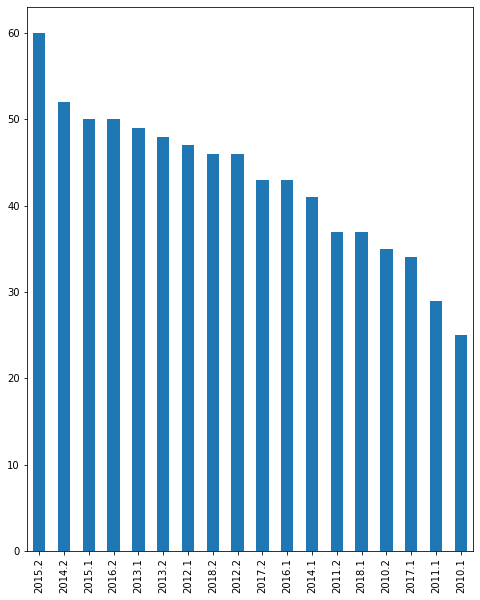

In [30]:
plt.figure(figsize=(8,10))

df10 = df[(df['ANO_PERIODO'] >= 2007.2) & (df['HORARIOS'] == '24N12') | (df['HORARIOS'] == '36N12') | 
          (df['HORARIOS'] == '45N34')]
pd.value_counts(df10['ANO_PERIODO']).plot.bar()

In [29]:
pd.value_counts(df10['ANO_PERIODO'])

2015.2    37
2013.1    37
2018.2    36
2013.2    35
2012.1    34
2012.2    32
2014.2    31
2016.2    31
2015.1    29
2018.1    28
2017.2    27
2014.1    27
2016.1    25
2011.2    25
2017.1    24
2010.2    19
2011.1    17
2010.1    15
Name: ANO_PERIODO, dtype: int64